In [ ]:
fimport numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Dataset/train_net.csv')
#test = pd.read_csv('/content/drive/My Drive/Dataset/test_net.csv')

In [ ]:
#file = ("test_net.csv")
#file2 = ("train_net.csv")

In [ ]:
#test = pd.read_csv(file)
#train = pd.read_csv(file2)

In [ ]:
#print(test)
train.head()

,FLOW_ID,PROTOCOL_MAP,L4_SRC_PORT,IPV4_SRC_ADDR,L4_DST_PORT,IPV4_DST_ADDR,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,...,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP,ANOMALY,ALERT,ID
0,372018590,udp,53950,10.114.232.40,53,10.114.226.5,1647760833,1,1647760833,17,...,0,0,165,2,275,2,1647760873,0.0,None,0
1,368604472,tcp,37914,10.114.241.166,38303,10.114.224.218,1647686725,1,1647686725,6,...,0,0,44,1,40,1,1647687338,0.0,Port Scanning,1
2,367513992,tcp,33216,10.114.241.166,18757,10.114.224.116,1647680044,0,1647680044,6,...,0,0,44,1,40,1,1647680115,1.0,Port Scanning,2
3,371997670,udp,48627,10.114.225.205,53,10.114.226.5,1647760172,0,1647760172,17,...,0,0,128,2,160,2,1647760207,0.0,None,3
4,374311119,udp,35939,10.114.225.205,53,10.114.226.5,1647780916,0,1647780916,17,...,0,0,172,2,300,2,1647780984,0.0,None,4


In [ ]:
train.dtypes

FLOW_ID                         int64
PROTOCOL_MAP                   object
L4_SRC_PORT                     int64
IPV4_SRC_ADDR                  object
L4_DST_PORT                     int64
IPV4_DST_ADDR                  object
FIRST_SWITCHED                  int64
FLOW_DURATION_MILLISECONDS      int64
LAST_SWITCHED                   int64
PROTOCOL                        int64
TCP_FLAGS                       int64
TCP_WIN_MAX_IN                  int64
TCP_WIN_MAX_OUT                 int64
TCP_WIN_MIN_IN                  int64
TCP_WIN_MIN_OUT                 int64
TCP_WIN_MSS_IN                  int64
TCP_WIN_SCALE_IN                int64
TCP_WIN_SCALE_OUT               int64
SRC_TOS                         int64
DST_TOS                         int64
TOTAL_FLOWS_EXP                 int64
MIN_IP_PKT_LEN                  int64
MAX_IP_PKT_LEN                  int64
TOTAL_PKTS_EXP                  int64
TOTAL_BYTES_EXP                 int64
IN_BYTES                        int64
IN_PKTS     

In [ ]:
train.shape

(4217625, 33)

Creating a dataframe for categorical variables

In [ ]:
tr_cat = train[['PROTOCOL_MAP','IPV4_SRC_ADDR','IPV4_DST_ADDR','ALERT']]

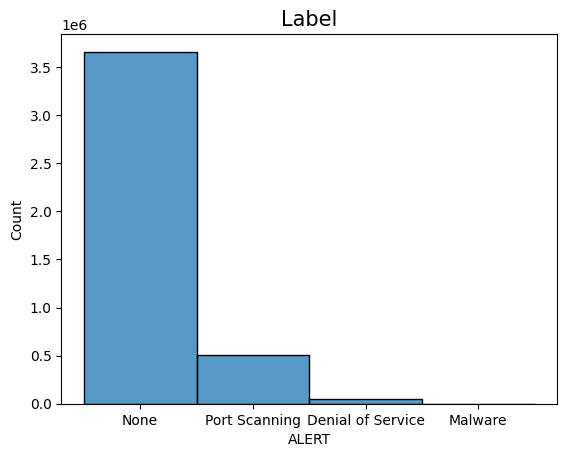

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(tr_cat['ALERT'])
plt.title('Label', fontsize=15)
plt.savefig('/content/drive/My Drive/Dataset/label.png', dpi=300, bbox_inches='tight')

In [ ]:
Counter = [{'None': 1829817, 'Port Scanning': 961978, 'Denial of Service': 819880,'Malware': 605950}]

a = ('None', 'Port Scanning', 'Denial of Service','Malware')
b= (1829817, 961978, 819880,605950)

sns.barplot(dt)
plt.title('Label', fontsize=15)
plt.savefig('/content/drive/My Drive/Dataset/label_bal.png', dpi=300, bbox_inches='tight')

KeyError: ignored

In [ ]:
#dt = {a:b}
dt

,x,y


In [ ]:
dt = pd.DataFrame(dt, columns=('x','y'))

In [ ]:
tr_cat['PROTOCOL_MAP'].value_counts()

tcp          2099470
udp          1792273
icmp          324539
gre             1164
ipv6-icmp        156
skip              22
ipv6               1
Name: PROTOCOL_MAP, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

#tr_cat['IPV4_SRC_ADDR'].plot.bar()

In [ ]:
tr_cat['IPV4_SRC_ADDR'].value_counts()

10.114.241.166    507845
10.114.225.206    490237
10.114.225.205    482296
10.114.226.5      437165
10.114.225.204    367409
                   ...  
85.67.103.184          1
96.246.214.208         1
42.238.162.145         1
60.20.150.107          1
170.150.83.236         1
Name: IPV4_SRC_ADDR, Length: 47039, dtype: int64

In [ ]:
tr_cat['IPV4_DST_ADDR'].value_counts()

10.114.226.5      970257
10.114.241.113     80976
10.114.225.206     67472
8.8.8.8            66514
10.114.224.73      55961
                   ...  
217.70.187.25          1
117.183.136.0          1
223.189.70.149         1
183.179.189.52         1
50.53.131.252          1
Name: IPV4_DST_ADDR, Length: 53608, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

#tr_cat['ALERT'].plot.bar()

In [ ]:
tr_cat['ALERT'].value_counts()   #Alert feature is the attack type.

None                 3659000
Port Scanning         507845
Denial of Service      50392
Malware                  388
Name: ALERT, dtype: int64

In [ ]:
y_df = train.loc[:,['ALERT']].values

In [ ]:
y_df

array([['None'],
       ['Port Scanning'],
       ['Port Scanning'],
       ...,
       ['None'],
       ['None'],
       ['None']], dtype=object)

In [ ]:
#dropping irrelevant feature and the label before feature selection
x = train.drop(['FLOW_ID','PROTOCOL_MAP','IPV4_SRC_ADDR','IPV4_DST_ADDR','ALERT','ANOMALY','ID'], axis =1)

In [ ]:
x

,L4_SRC_PORT,L4_DST_PORT,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,...,TOTAL_FLOWS_EXP,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP
0,53950,53,1647760833,1,1647760833,17,0,0,0,0,...,372018590,0,0,0,0,165,2,275,2,1647760873
1,37914,38303,1647686725,1,1647686725,6,22,1024,0,1024,...,368604472,0,0,0,0,44,1,40,1,1647687338
2,33216,18757,1647680044,0,1647680044,6,22,1024,0,1024,...,367513992,0,0,0,0,44,1,40,1,1647680115
3,48627,53,1647760172,0,1647760172,17,0,0,0,0,...,371997670,0,0,0,0,128,2,160,2,1647760207
4,35939,53,1647780916,0,1647780916,17,0,0,0,0,...,374311119,0,0,0,0,172,2,300,2,1647780984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217620,54467,4567,1647710799,0,1647710799,6,2,1024,0,1024,...,370347094,0,0,0,0,44,1,0,0,1647710854
4217621,33216,30346,1647680088,0,1647680088,6,22,1024,0,1024,...,367592747,0,0,0,0,44,1,40,1,1647680164
4217622,34264,53,1647679379,1004,1647679380,17,0,0,0,0,...,367278632,0,0,0,0,330,4,550,4,1647679416
4217623,52453,53,1647330926,14,1647330926,17,0,0,0,0,...,318573966,0,0,0,0,90,1,364,1,1647330995


In [ ]:
#sns.pairplot(x)

In [ ]:
#checking for missing values

train.isna().sum()

In [ ]:
#train.drop(columns = 'ANOMALY',axis =1, inplace=True)

Feature selection

In [ ]:
#Using SelectKBest

from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import MinMaxScaler

import pickle #to save and load the model

In [ ]:
x_MMscaler = MinMaxScaler().fit_transform(x)  #feature scaling

In [ ]:
features = x.columns

In [ ]:
features

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'FIRST_SWITCHED',
       'FLOW_DURATION_MILLISECONDS', 'LAST_SWITCHED', 'PROTOCOL', 'TCP_FLAGS',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'TCP_WIN_MIN_IN',
       'TCP_WIN_MIN_OUT', 'TCP_WIN_MSS_IN', 'TCP_WIN_SCALE_IN',
       'TCP_WIN_SCALE_OUT', 'SRC_TOS', 'DST_TOS', 'TOTAL_FLOWS_EXP',
       'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN', 'TOTAL_PKTS_EXP', 'TOTAL_BYTES_EXP',
       'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS', 'ANALYSIS_TIMESTAMP'],
      dtype='object')

In [ ]:
x_MMscaler = pd.DataFrame(x_MMscaler, columns = features)

In [ ]:
x_MMscaler

,L4_SRC_PORT,L4_DST_PORT,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,TCP_WIN_MIN_IN,...,TOTAL_FLOWS_EXP,MIN_IP_PKT_LEN,MAX_IP_PKT_LEN,TOTAL_PKTS_EXP,TOTAL_BYTES_EXP,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,ANALYSIS_TIMESTAMP
0,0.823224,0.000809,0.481098,0.000008,0.481045,0.280702,0.000000,0.000000,0.0,0.000000,...,0.993702,0.0,0.0,0.0,0.0,9.369583e-08,0.000001,7.752575e-08,6.656823e-07,0.481014
1,0.578531,0.584466,0.398396,0.000008,0.398335,0.087719,0.086275,0.015625,0.0,0.015625,...,0.984583,0.0,0.0,0.0,0.0,1.094258e-08,0.000000,1.127647e-08,3.328412e-07,0.398939
2,0.506844,0.286213,0.390940,0.000000,0.390878,0.087719,0.086275,0.015625,0.0,0.015625,...,0.981670,0.0,0.0,0.0,0.0,1.094258e-08,0.000000,1.127647e-08,3.328412e-07,0.390877
3,0.742000,0.000809,0.480360,0.000000,0.480307,0.280702,0.000000,0.000000,0.0,0.000000,...,0.993646,0.0,0.0,0.0,0.0,6.839111e-08,0.000001,4.510589e-08,6.656823e-07,0.480271
4,0.548394,0.000809,0.503510,0.000000,0.503459,0.280702,0.000000,0.000000,0.0,0.000000,...,0.999826,0.0,0.0,0.0,0.0,9.848320e-08,0.000001,8.457355e-08,6.656823e-07,0.503461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4217620,0.831113,0.069688,0.425262,0.000000,0.425203,0.087719,0.007843,0.015625,0.0,0.015625,...,0.989238,0.0,0.0,0.0,0.0,1.094258e-08,0.000000,0.000000e+00,0.000000e+00,0.425186
4217621,0.506844,0.463050,0.390989,0.000000,0.390927,0.087719,0.086275,0.015625,0.0,0.015625,...,0.981880,0.0,0.0,0.0,0.0,1.094258e-08,0.000000,1.127647e-08,3.328412e-07,0.390932
4217622,0.522835,0.000809,0.390198,0.008367,0.390137,0.280702,0.000000,0.000000,0.0,0.000000,...,0.981041,0.0,0.0,0.0,0.0,2.065412e-07,0.000003,1.550515e-07,1.331365e-06,0.390097
4217623,0.800381,0.000809,0.001337,0.000117,0.001238,0.280702,0.000000,0.000000,0.0,0.000000,...,0.850946,0.0,0.0,0.0,0.0,4.240249e-08,0.000000,1.026159e-07,3.328412e-07,0.001211


In [ ]:
y_df= pd.DataFrame(y_df)

In [ ]:
y_df

,0
0,None
1,Port Scanning
2,Port Scanning
3,None
4,None
...,...
4217620,None
4217621,Port Scanning
4217622,None
4217623,None


In [ ]:
y= pd.get_dummies(y_df) #1-hot encoding Alert feature

In [ ]:
y

,0_Denial of Service,0_Malware,0_None,0_Port Scanning
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
4217620,0,0,1,0
4217621,0,0,0,1
4217622,0,0,1,0
4217623,0,0,1,0


In [ ]:
#y_df[0].replace(['None','Port Scanning','Denial of Service','Malware'],[1,2,3,4], inplace=True)

In [ ]:
y = y.values

In [ ]:
x = x_MMscaler[features].values

In [ ]:
y.shape

(4217625, 4)

Feature selection using NN input pertubation

In [ ]:
# defining the function for feature selection

def perturbation_rank (model, x, y, names, regression):
  errors = []

  for i in range(x.shape[1]):
    hold = np.array(x[:, i])
    np.random.shuffle(x[:, i])

    if regression:
      pred = model.predict(x)
      error = metrics.mean_squared_error(y, pred)
    else:
      pred = model.predict(x)
      error = metrics.log_loss(y, pred)

    errors.append(error)
    x[:, i] = hold

  max_error = np.max(errors)
  importance = [e/max_error for e in errors]

  data = {'name':names, 'error':errors, 'importance':importance}
  result = pd.DataFrame(data, columns=['name','error','importance'])
  result.sort_values(by=['importance'], ascending=[0], inplace=True)
  result.reset_index(inplace=True, drop=True)
  return result

In [ ]:
from sklearn import metrics
import requests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train, y_train, verbose=2, validation_data=(x_test, y_test), callbacks=[monitor], epochs=1000)

NameError: ignored

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1350      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                260       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 4)                 4

In [ ]:
save_model = open("/content/drive/My Drive/Dataset/model.pickle", "wb") # saving the model above
pickle.dump(model, save_model)
save_model.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-03-22 17:42:26           64
config.json                                    2023-03-22 17:42:26         2684
variables.h5                                   2023-03-2

In [ ]:
save_model

<_io.BufferedWriter name='model.pickle'>

In [ ]:
#names=list(x_MMscaler.columns)
rank= perturbation_rank(model, x_test, y_test, features, False)
rank

26361/26361 [==============================] - 34s 1ms/step


,name,error,importance
0,TCP_WIN_MSS_IN,1.455480,1.000000
1,TCP_WIN_MAX_IN,0.483170,0.331966
2,TCP_WIN_MIN_IN,0.470931,0.323557
3,TCP_WIN_SCALE_IN,0.441795,0.303539
4,TCP_WIN_SCALE_OUT,0.337650,0.231986
5,L4_SRC_PORT,0.331934,0.228058
6,PROTOCOL,0.307400,0.211202
7,TCP_WIN_MAX_OUT,0.280017,0.192388
8,TCP_WIN_MIN_OUT,0.269870,0.185417
9,SRC_TOS,0.249329,0.171303


In [ ]:
save_rank = open("/content/drive/My Drive/Dataset/rank.pickle", "wb") # saving the rank above
pickle.dump(rank, save_rank)
save_rank.close()

In [ ]:
import pickle

with open("/content/drive/My Drive/Dataset/rank.pickle","rb") as save_rank:
  rank = pickle.load(save_rank)

In [ ]:
rank

,name,error,importance
0,TCP_WIN_MSS_IN,1.455480,1.000000
1,TCP_WIN_MAX_IN,0.483170,0.331966
2,TCP_WIN_MIN_IN,0.470931,0.323557
3,TCP_WIN_SCALE_IN,0.441795,0.303539
4,TCP_WIN_SCALE_OUT,0.337650,0.231986
5,L4_SRC_PORT,0.331934,0.228058
6,PROTOCOL,0.307400,0.211202
7,TCP_WIN_MAX_OUT,0.280017,0.192388
8,TCP_WIN_MIN_OUT,0.269870,0.185417
9,SRC_TOS,0.249329,0.171303


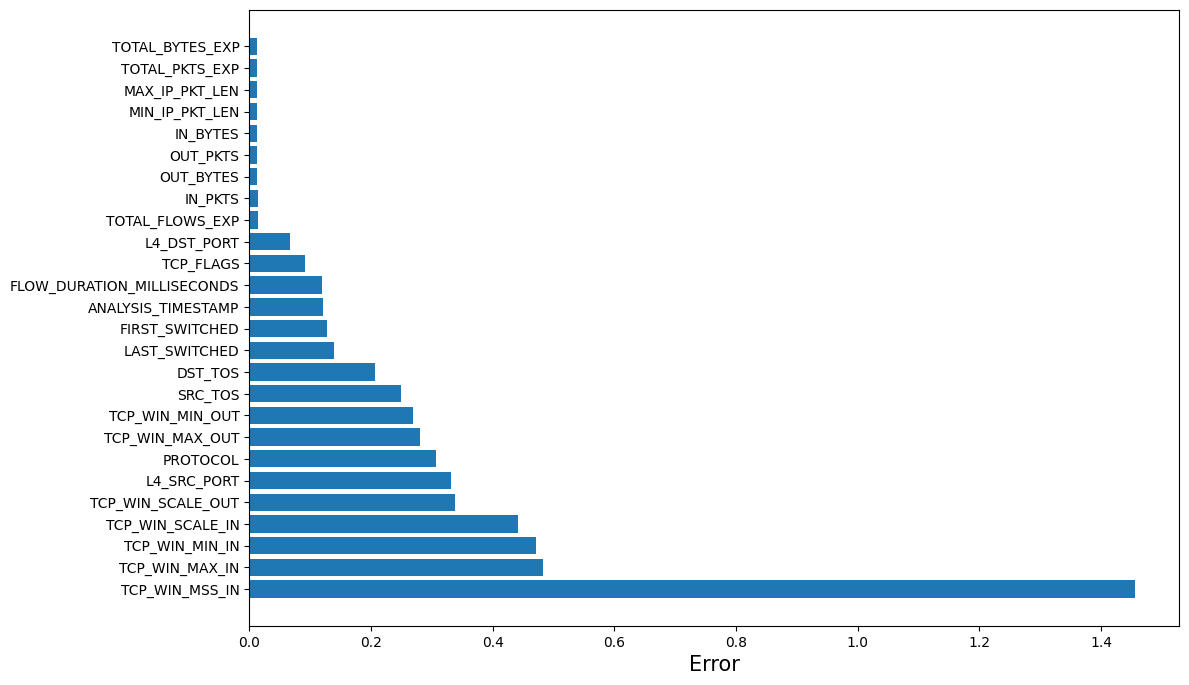

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.barh(rank['name'], rank['error'])
plt.xlabel('Error', fontsize=15)
plt.savefig('/content/drive/My Drive/Dataset/rank_err.png', dpi=300, bbox_inches='tight')

In [ ]:
rank_head = list(rank.name[:11])

In [ ]:
rank_head

['TCP_WIN_MSS_IN',
 'TCP_WIN_MAX_IN',
 'TCP_WIN_MIN_IN',
 'TCP_WIN_SCALE_IN',
 'TCP_WIN_SCALE_OUT',
 'L4_SRC_PORT',
 'PROTOCOL',
 'TCP_WIN_MAX_OUT',
 'TCP_WIN_MIN_OUT',
 'SRC_TOS',
 'DST_TOS']

In [ ]:
df = train[rank_head]

In [ ]:
#Alternative: create a new dataframe using results from pertubation rank
df= train[['TCP_WIN_MSS_IN',
 'TCP_WIN_MIN_IN',
 'TCP_WIN_SCALE_IN',
 'TCP_WIN_MAX_IN',
 'PROTOCOL',
 'L4_SRC_PORT',
 'ANALYSIS_TIMESTAMP',
 'TCP_WIN_MAX_OUT',
 'LAST_SWITCHED',
 'TCP_WIN_MIN_OUT',
 'TCP_WIN_SCALE_OUT',
 'FIRST_SWITCHED',
 'DST_TOS',
 'SRC_TOS',
 'FLOW_DURATION_MILLISECONDS',
 'TCP_FLAGS']]

In [ ]:
df

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS
0,0,0,0,0,0,53950,17,0,0,0,0
1,1460,1024,1024,0,0,37914,6,0,0,0,0
2,1460,1024,1024,0,0,33216,6,0,0,0,0
3,0,0,0,0,0,48627,17,0,0,0,0
4,0,0,0,0,0,35939,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4217620,1460,1024,1024,0,0,54467,6,0,0,0,0
4217621,1460,1024,1024,0,0,33216,6,0,0,0,0
4217622,0,0,0,0,0,34264,17,0,0,0,0
4217623,0,0,0,0,0,52453,17,0,0,0,0


Value distribution

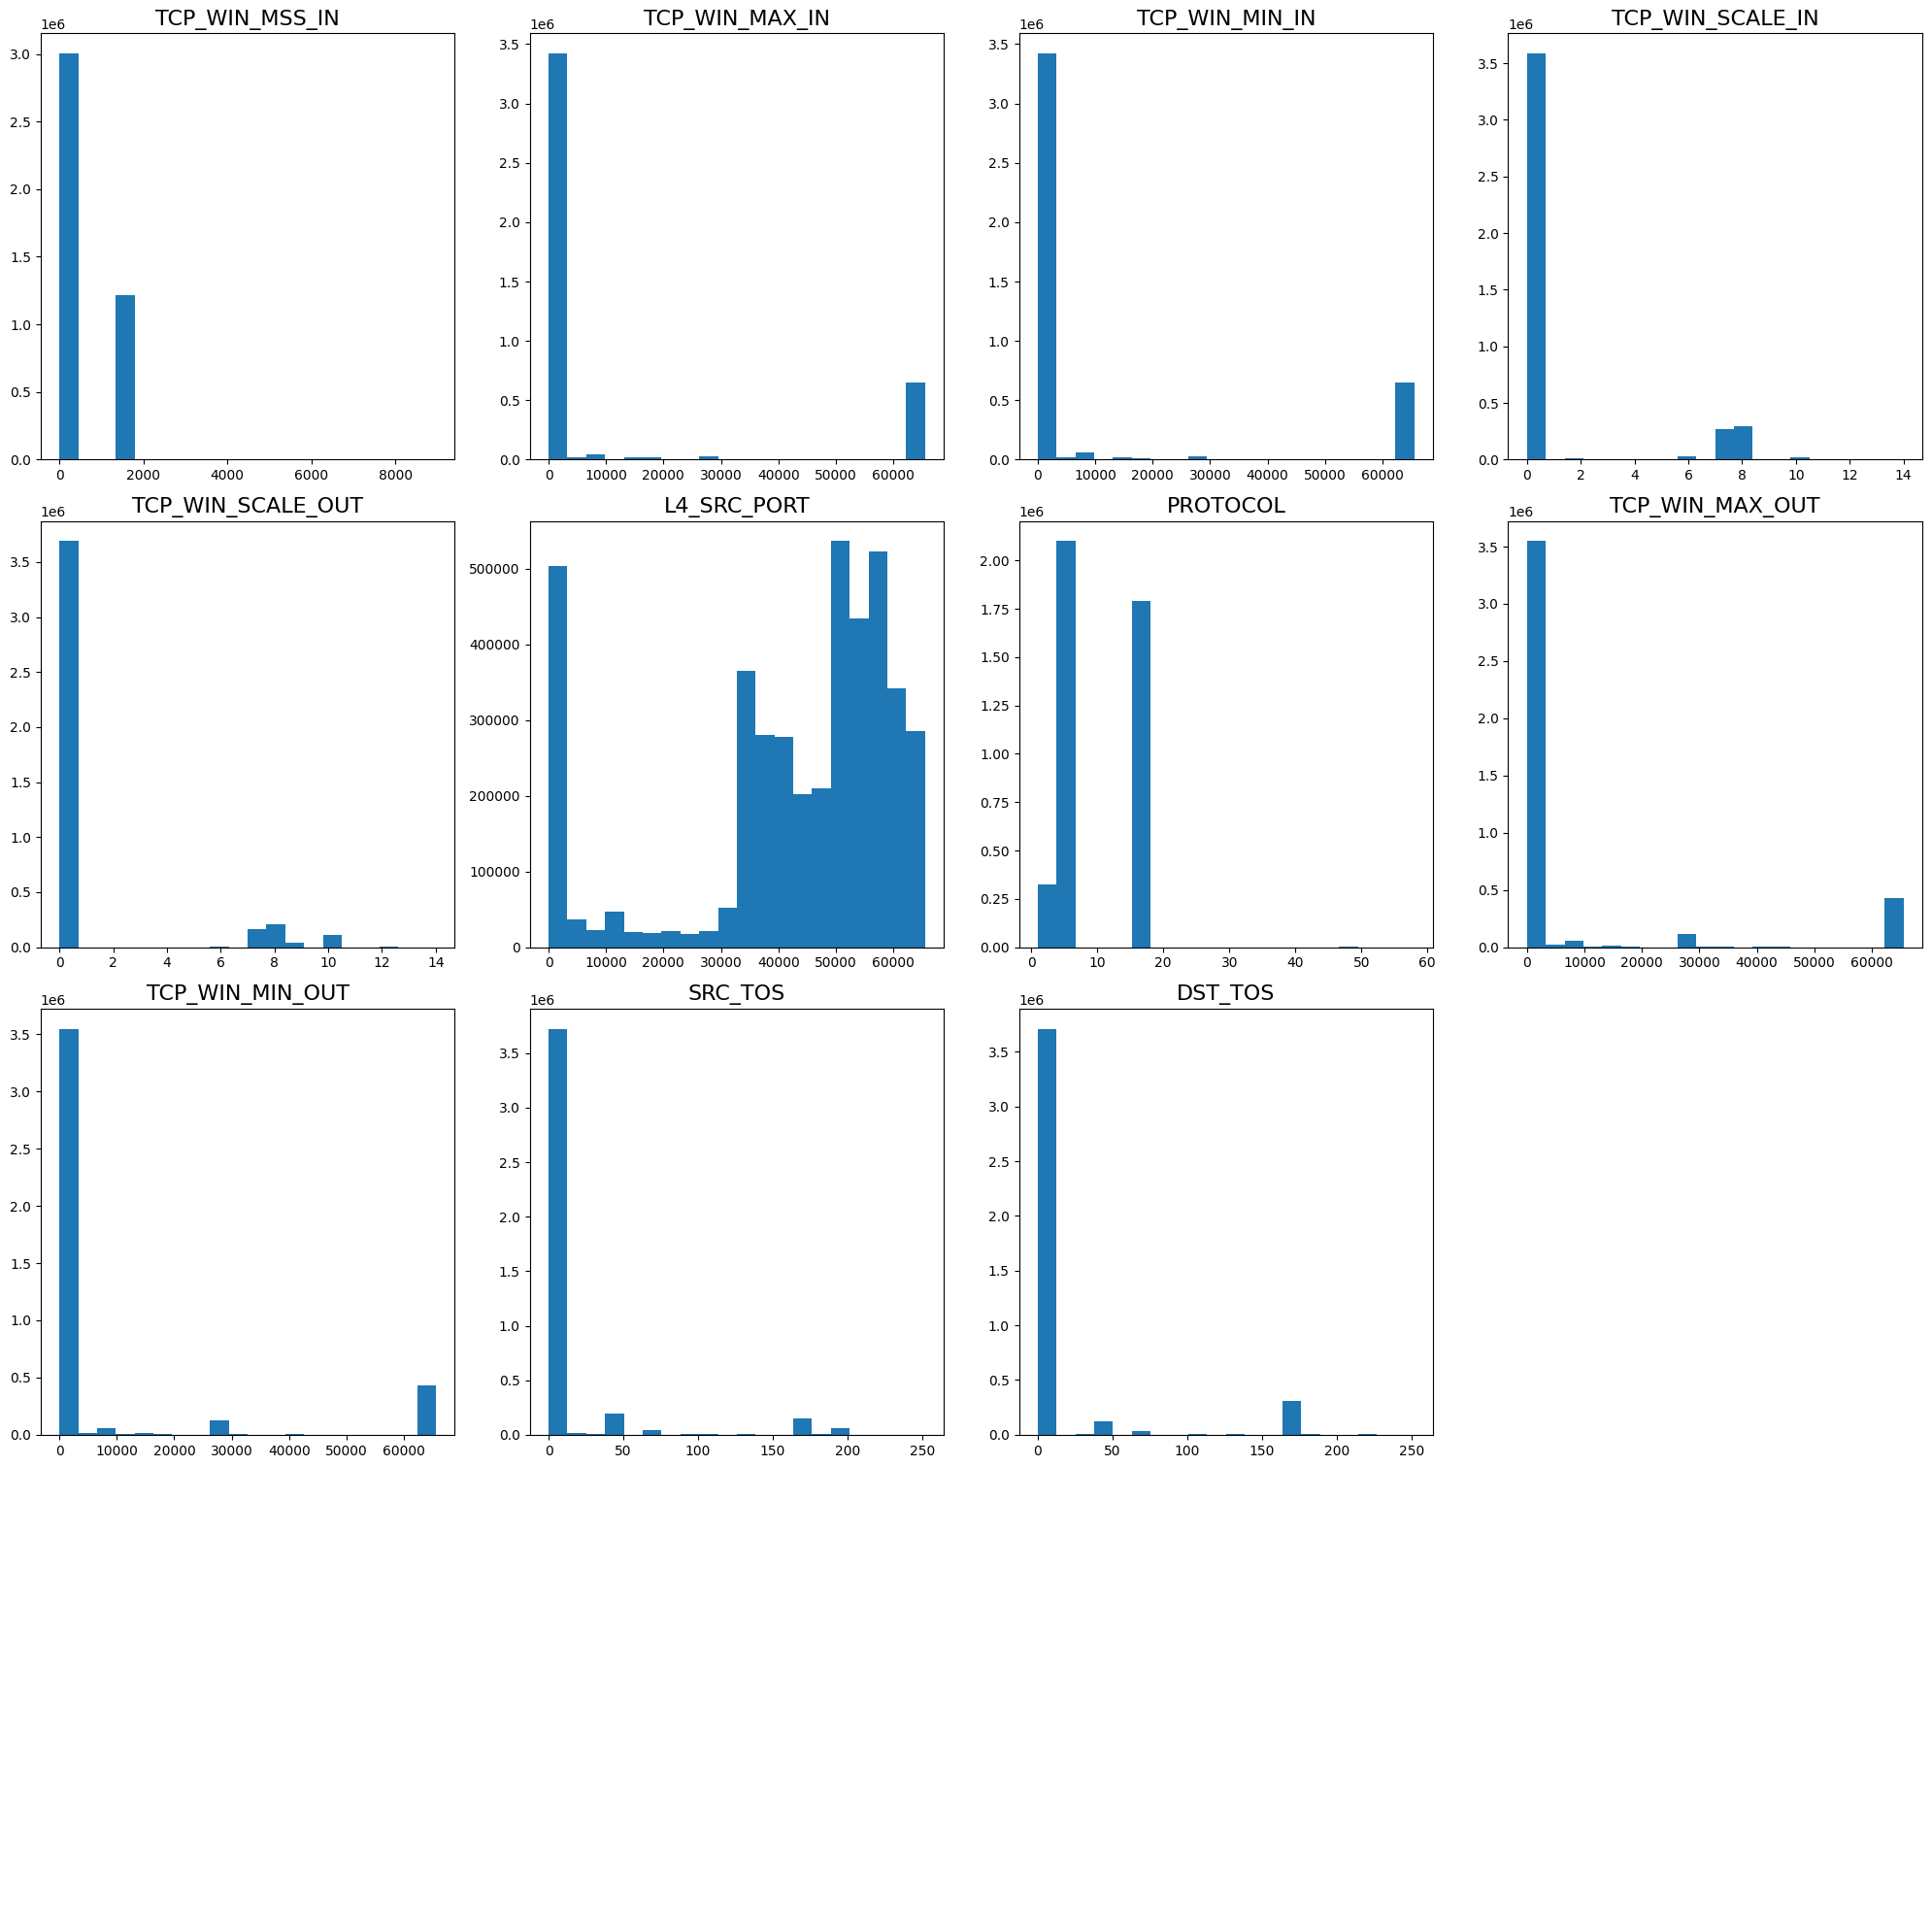

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the features that you want to plot
features_to_plot = list(df.columns)

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = 4

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))
axs = axs.ravel()

# Plot the histograms for each feature
for i, feature in enumerate(features_to_plot):
    axs[i].hist(df[feature], bins=20)
    axs[i].set_title(feature, fontsize=16)

# Remove the unused subplots
for i in range(len(features_to_plot), num_rows*num_cols):
    axs[i].axis('off')

# Show the plots
plt.tight_layout()
plt.show()


<Axes: >

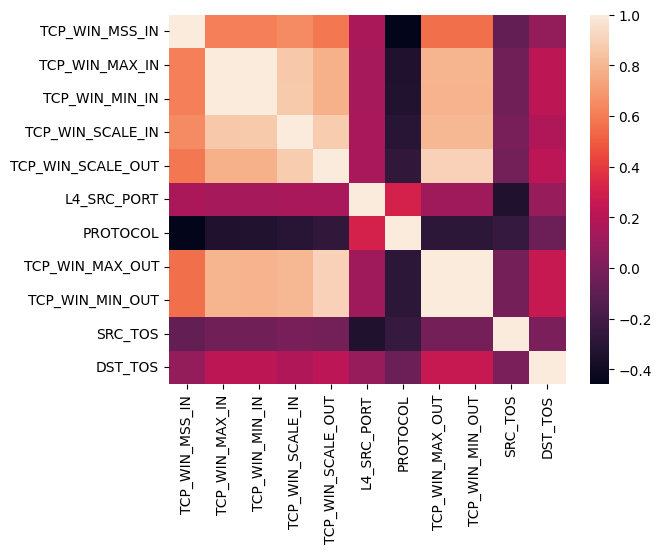

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())

In [ ]:
df['PROTOCOL'].unique()

array([17,  6,  1, 47, 57, 58, 41])

Rebalancing the data using SMOTE

In [ ]:

!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
y =train['ALERT'].replace(['None','Port Scanning','Denial of Service','Malware'],[1,2,3,4])

In [ ]:
u = {1:1829817}

In [ ]:
o = {4:605950,3:819880, 2:961978}

In [ ]:
o

{4: 605950, 3: 819880, 2: 961978}

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
x=df
y=train['ALERT'].replace(['None','Port Scanning','Denial of Service','Malware'],[1,2,3,4])
#X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define pipeline
over = SMOTE(sampling_strategy=o)
under = RandomUnderSampler(sampling_strategy=u)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
x, y = pipeline.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 3659000, 2: 507845, 3: 50392, 4: 388})
Counter({1: 1829817, 2: 961978, 3: 819880, 4: 605950})


In [ ]:
y=pd.DataFrame(y)

In [ ]:
x.to_csv('/content/drive/My Drive/Dataset/df_resample.csv')
y.to_csv('/content/drive/My Drive/Dataset/y_resample.csv')

In [ ]:
df_resample = pd.read_csv('/content/drive/My Drive/Dataset/df_resample.csv')
y_resample = pd.read_csv('/content/drive/My Drive/Dataset/y_resample.csv')

In [ ]:
y.shape

(3252095,)

In [ ]:
df_resample = df_resample.drop('Unnamed: 0', axis=1)
y_resample = y_resample.drop('Unnamed: 0', axis=1)


In [ ]:
y_resample

,ALERT
0,1
1,1
2,1
3,1
4,1
...,...
4217620,4
4217621,4
4217622,4
4217623,4


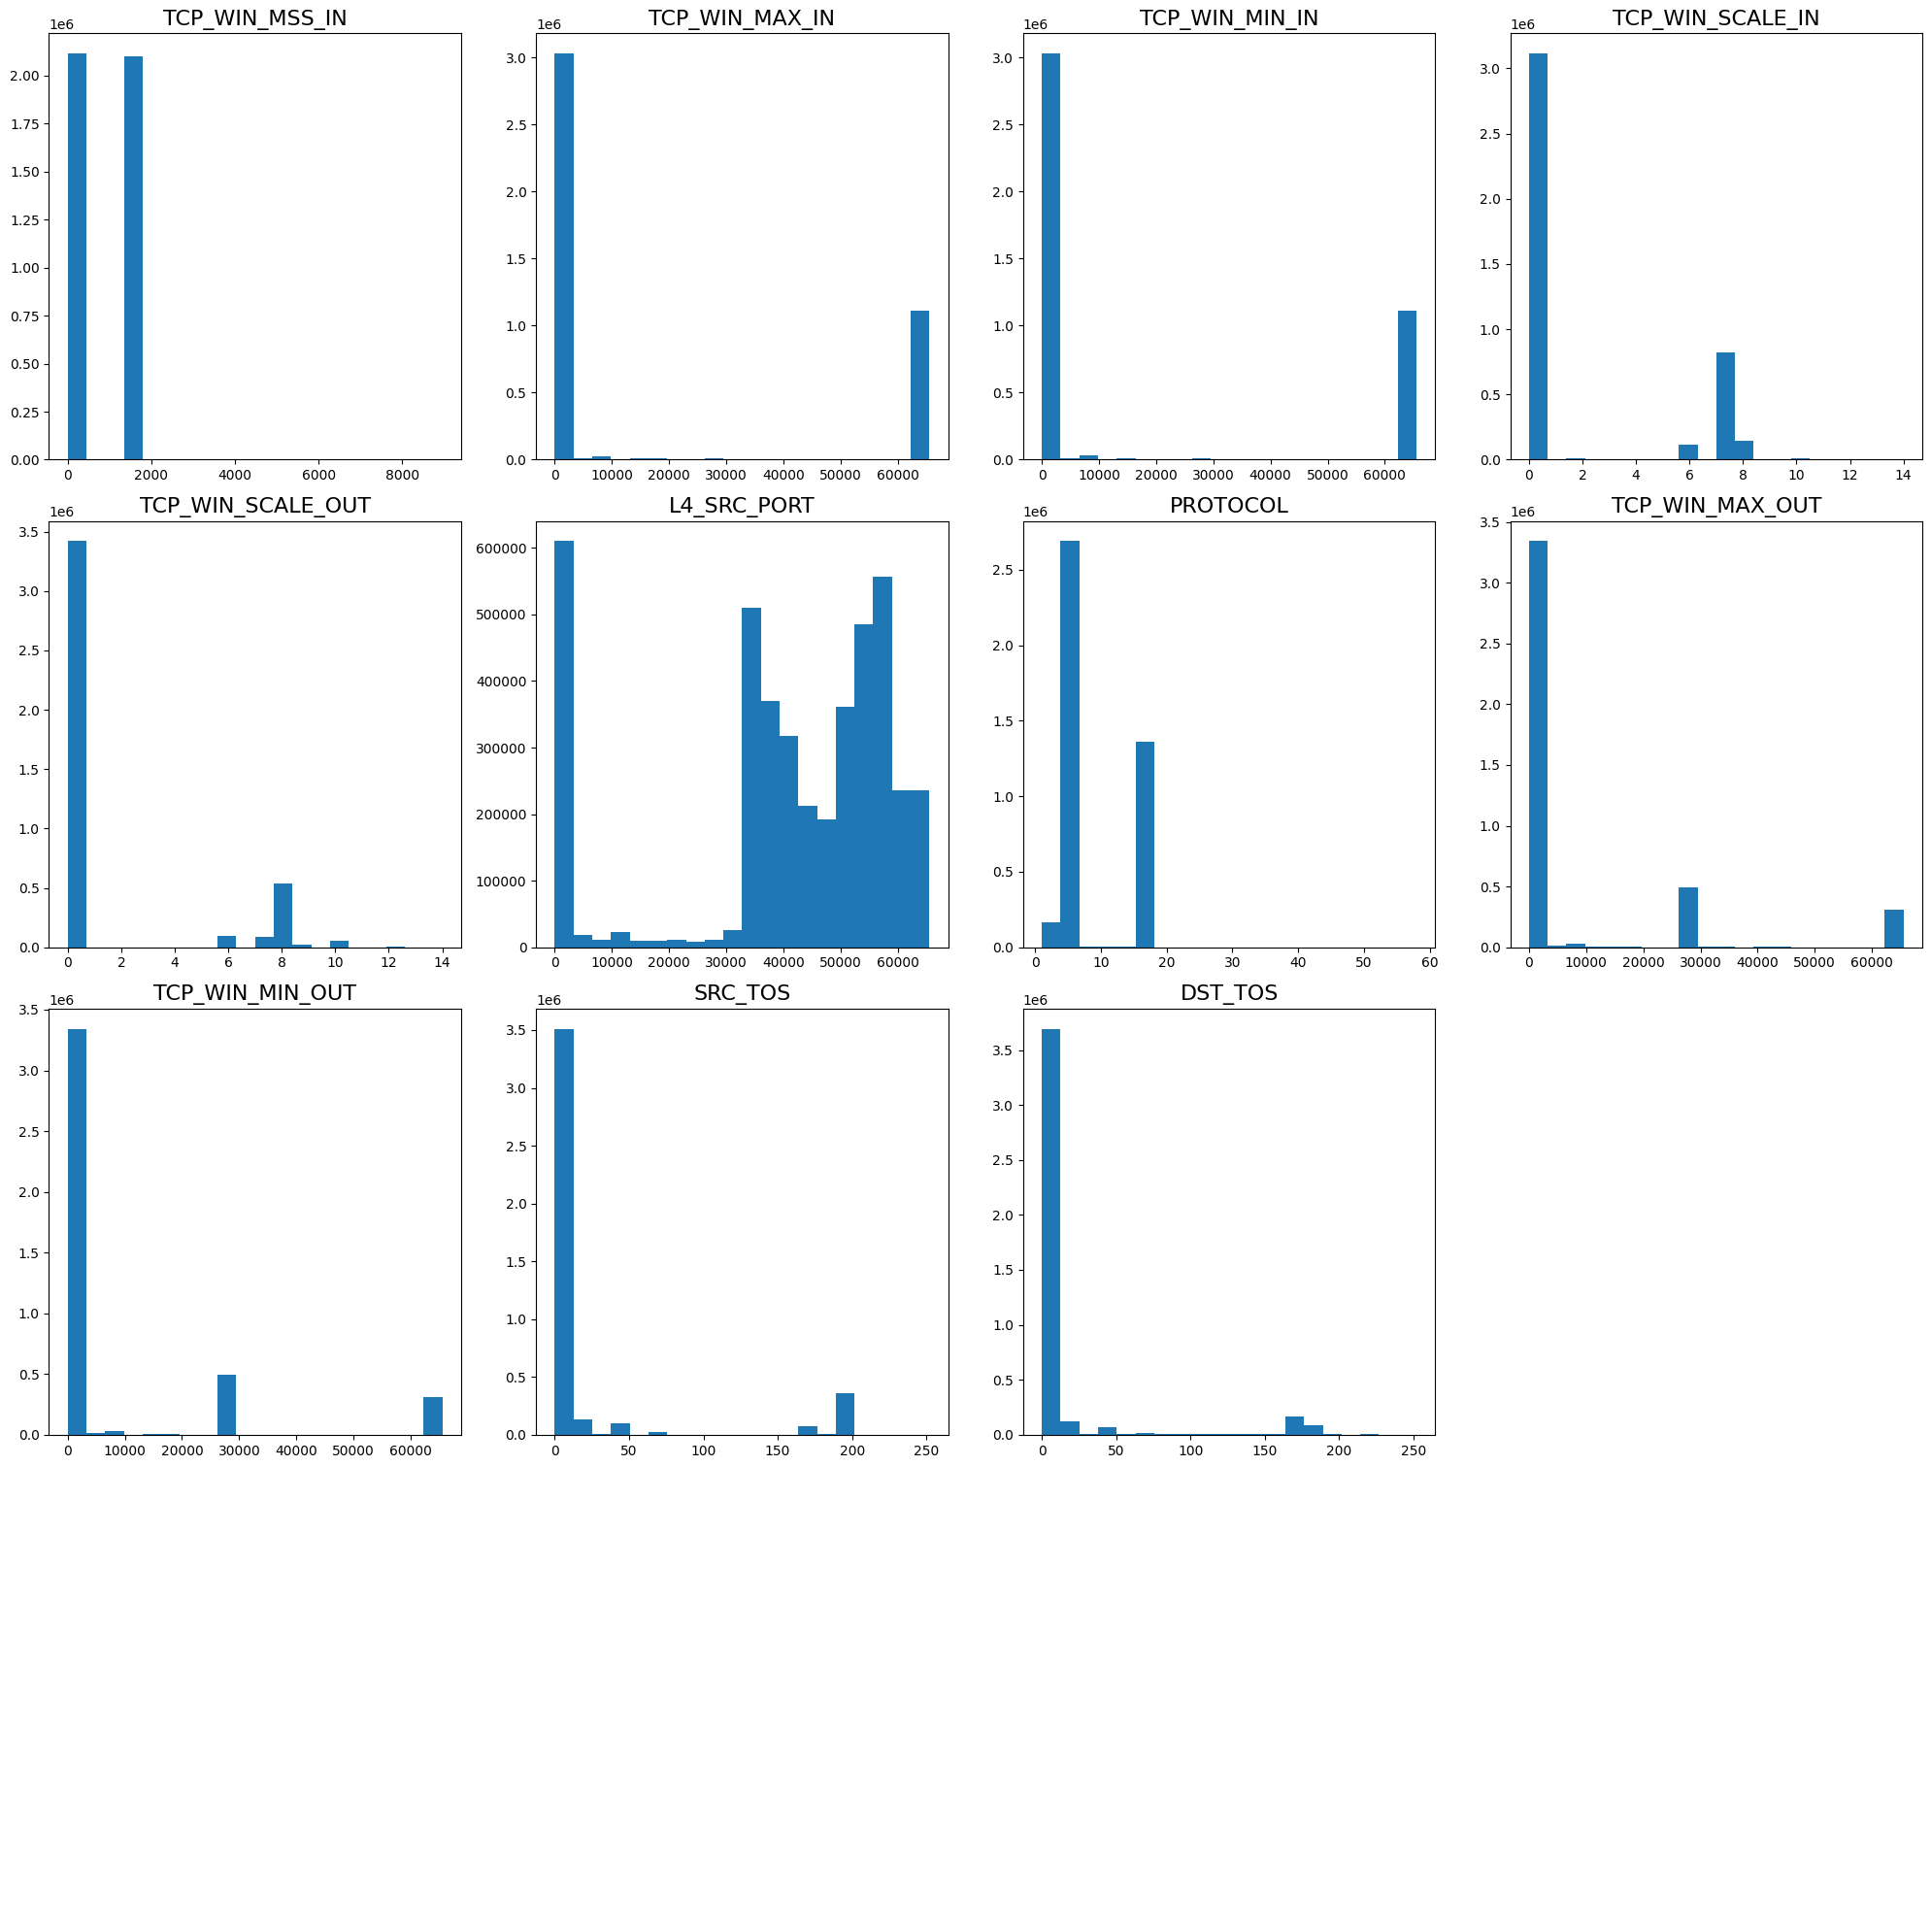

In [ ]:
# Select the features that you want to plot
features_to_plot = list(x.columns)

# Set the number of rows and columns for the subplots
num_rows = 4
num_cols = 4

# Create the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20,20))
axs = axs.ravel()

# Plot the histograms for each feature
for i, feature in enumerate(features_to_plot):
    axs[i].hist(x[feature], bins=20)
    axs[i].set_title(feature, fontsize=16)

# Remove the unused subplots
for i in range(len(features_to_plot), num_rows*num_cols):
    axs[i].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
y =y_resample['ALERT'].replace([1,2,3,4],[1,-1,-1,-1])
y

0          1
1          1
2          1
3          1
4          1
          ..
4217620   -1
4217621   -1
4217622   -1
4217623   -1
4217624   -1
Name: ALERT, Length: 4217625, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

x_sample, x_sample2, y_sample, y_sample2 = train_test_split(df_resample, y, test_size=0.9, stratify=y, random_state=42)

In [ ]:
y_sample.value_counts()

-1    238781
 1    182981
Name: ALERT, dtype: int64

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size=0.5, stratify=y_sample, random_state=50)

x_test_index =x_test.index

import numpy as np
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

from sklearn.svm import OneClassSVM

one_class_svm = OneClassSVM(nu=0.6, kernel = 'rbf', gamma = 'auto').fit(x_train)

prediction = one_class_svm.predict(x_test)

#prediction = [1 if i==-1 else 0 for i in prediction]

scored_onesvm = pd.DataFrame(x_test, columns=df.columns)
scored_onesvm['Anomaly'] = prediction
#x_test['index'] = x_test.index

#Anomalies = x_test[x_test['Anomaly'] == 1 ]

#Anomalies.to_csv('/content/drive/My Drive/Dataset/Anomalies.csv')



In [ ]:
scored_onesvm

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS,Anomaly
0,0.162946,0.015625,0.015625,0.0,0.0,0.578548,0.087719,0.0,0.0,0.00000,0.00000,1
1,0.000000,0.000000,0.000000,0.0,0.0,0.800101,0.280702,0.0,0.0,0.00000,0.00000,1
2,0.000000,0.000000,0.000000,0.0,0.0,0.881342,0.280702,0.0,0.0,0.00000,0.00000,1
3,0.000000,0.000000,0.000000,0.0,0.0,0.538599,0.280702,0.0,0.0,0.00000,0.00000,1
4,0.162946,0.015625,0.015625,0.0,0.0,0.851342,0.087719,0.0,0.0,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210876,0.000000,0.000000,0.000000,0.0,0.0,0.577831,0.280702,0.0,0.0,0.00000,0.00000,1
210877,0.000000,0.000000,0.000000,0.0,0.0,0.984512,0.280702,0.0,0.0,0.00000,0.00000,1
210878,0.000000,0.018311,0.015625,0.0,0.0,0.742435,0.087719,0.0,0.0,0.66129,0.66129,-1
210879,0.000000,0.000000,0.000000,0.0,0.0,0.602750,0.280702,0.0,0.0,0.00000,0.00000,1


In [ ]:
y = y_test.replace([1,0],[1,-1])

In [ ]:
y

27888     -1
948764     1
526011     1
1956549    1
1960936   -1
          ..
3427572    1
1553100    1
1141836    1
3195115    1
319106     1
Name: ALERT, Length: 210881, dtype: int64

In [ ]:
import pickle

save_one_class_svm = open("/content/drive/My Drive/Dataset/one_class_svm.pickle", "wb") # saving the rank above
pickle.dump(one_class_svm, save_one_class_svm)
save_one_class_svm.close()

In [ ]:
with open("/content/drive/My Drive/Dataset/one_class_svm.pickle","rb") as save_one_class_svm:
  one_class_svm = pickle.load(save_one_class_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator OneClassSVM from version 0.22.2.post1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5, stratify=y, random_state=50)

x_test_index =x_test.index

import numpy as np
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#from sklearn.svm import OneClassSVM

In [ ]:
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
y_test['ALERT'].value_counts()

1    914909
2    480989
3    409940
4    302975
Name: ALERT, dtype: int64

In [ ]:
inputs = ['TCP_WIN_MSS_IN',	'TCP_WIN_MAX_IN',	'TCP_WIN_MIN_IN',	'TCP_WIN_SCALE_IN',	'TCP_WIN_SCALE_OUT',	'L4_SRC_PORT',	'PROTOCOL',	'TCP_WIN_MAX_OUT',	'TCP_WIN_MIN_OUT',	'SRC_TOS',	'DST_TOS']

In [ ]:
model_IF = IsolationForest(contamination=float(0.15),random_state=23)

In [ ]:
df = pd.DataFrame(x_train,columns=df.columns)

In [ ]:
df

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS
0,0.000000,0.000000,0.000000,0.0,0.0,0.879164,0.280702,0.000000,0.000000,0.0,0.000000
1,0.000000,0.007736,0.007736,0.0,0.0,0.681666,0.087719,0.004486,0.004486,0.0,0.650794
2,0.000000,0.000000,0.000000,0.0,0.0,0.615152,0.280702,0.000000,0.000000,0.0,0.888889
3,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.676768,0.280702,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2108807,0.000000,0.000000,0.000000,0.0,0.0,0.599023,0.280702,0.000000,0.000000,0.0,0.000000
2108808,0.000000,0.000000,0.000000,0.0,0.0,0.822995,0.280702,0.000000,0.000000,0.0,0.000000
2108809,0.162946,0.015625,0.015625,0.0,0.0,0.851316,0.087719,0.000000,0.000000,0.0,0.000000
2108810,0.162946,0.015625,0.015625,0.0,0.0,0.578531,0.087719,0.000000,0.000000,0.0,0.000000


In [ ]:
model_IF.fit(df[inputs])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.15, random_state=23)

In [ ]:
df['anomaly_scores'] = model_IF.decision_function(df[inputs])
df['anomaly'] = model_IF.predict(df[inputs])

In [ ]:
y_train.value_counts()

 1    1829500
-1     279312
Name: ALERT, dtype: int64

In [ ]:
y_train['actual'] =y_train['ALERT'].replace([1,2,3,4],[1,-1,-1,-1])
y_train

,ALERT,actual
1037142,1,1
1000353,1,1
3195847,3,-1
482379,1,1
2210461,2,-1
...,...,...
689922,1,1
3539211,3,-1
3318463,3,-1
3564834,3,-1


In [ ]:
y_train.drop(y_train.index, inplace=True)

In [ ]:
y_train

,ALERT,anomaly_scores,anomaly,actual


In [ ]:
train

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS,anomaly_scores,anomaly
0,0.162946,0.980240,0.980240,0.571429,0.642857,0.851560,0.087719,0.445563,0.445563,0.0,0.285714,-0.142130,-1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.690166,0.280702,0.000000,0.000000,0.0,0.000000,0.056852,1
2,0.162946,0.980240,0.980240,0.500000,0.000000,0.684123,0.087719,0.000000,0.000000,0.0,0.000000,-0.044563,-1
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.765911,0.280702,0.000000,0.000000,0.0,0.000000,0.063684,1
4,0.162946,0.015625,0.015625,0.000000,0.000000,0.851331,0.087719,0.000000,0.000000,0.0,0.000000,0.018939,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.028248,-1
2108808,0.162946,0.980240,0.980240,0.500000,0.000000,0.826795,0.087719,0.000000,0.000000,0.0,0.000000,-0.051173,-1
2108809,0.162946,0.980240,0.980240,0.500000,0.000000,0.595926,0.087719,0.000000,0.000000,0.0,0.000000,-0.050648,-1
2108810,0.162946,0.980240,0.980240,0.500000,0.571429,0.686824,0.087719,0.426642,0.426642,0.0,0.000000,-0.012939,-1


In [ ]:
train.to_csv('/content/drive/My Drive/Dataset/IsForest_train.csv')
y_train.to_csv('/content/drive/My Drive/Dataset/IsForest_actual.csv')

In [ ]:
df['anomaly'].value_counts()

 1    1793128
-1     315684
Name: anomaly, dtype: int64

In [ ]:
y =train['ALERT'].replace(['None','Port Scanning','Denial of Service','Malware'],[1,-1,-1,-1])
y

0          1
1         -1
2         -1
3          1
4          1
          ..
4217620    1
4217621   -1
4217622    1
4217623    1
4217624    1
Name: ALERT, Length: 4217625, dtype: int64

In [ ]:
y.value_counts()

 1    3659000
-1     558625
Name: ALERT, dtype: int64

In [ ]:
import numpy
from sklearn import metrics
import matplotlib.pyplot as plt

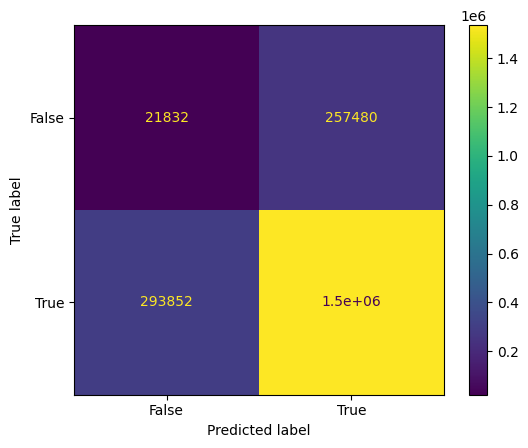

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train, df['anomaly'])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_train, df['anomaly'])
Accuracy

0.738558012757894

In [ ]:
Precision = metrics.precision_score(y_train, df['anomaly'])
Precision

0.8564073507301208

In [ ]:
Recall = metrics.recall_score(y_train, df['anomaly'])
Recall

0.839381251708117

In [ ]:
F1_score = metrics.f1_score(y_train, df['anomaly'])
F1_score

0.8478088282870888

In [ ]:
df

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS
0,0,0,0,0,0,53950,17,0,0,0,0
1,1460,1024,1024,0,0,37914,6,0,0,0,0
2,1460,1024,1024,0,0,33216,6,0,0,0,0
3,0,0,0,0,0,48627,17,0,0,0,0
4,0,0,0,0,0,35939,17,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4217620,1460,1024,1024,0,0,54467,6,0,0,0,0
4217621,1460,1024,1024,0,0,33216,6,0,0,0,0
4217622,0,0,0,0,0,34264,17,0,0,0,0
4217623,0,0,0,0,0,52453,17,0,0,0,0


In [ ]:
y=y_resample['ALERT'].replace([1,2,3,4],[1,0,0,0])

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_resample, y, test_size=0.5, shuffle = True, random_state=10)

x_test_index =x_test.index

import numpy as np
from numpy.random import seed
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train.shape

(2108812, 11)

In [ ]:
y_train.value_counts()

0    1193491
1     915321
Name: ALERT, dtype: int64

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model

def autoencoder_model(X):
    # Encoder
    inputs = Input(shape=(X.shape[1]))
    L1 = Dense(100, activation='relu')(inputs)
    L1 = Dropout(0.25)(L1)
    L2 = Dense(50, activation='relu')(L1)
    L2 = Dropout(0.25)(L2)
    L3 = Dense(20, activation='relu')(L2)
    #L4 = Dense(15, activation='relu')(L3)
    L5 = Dense(5, activation='relu')(L3)

    # Decoder
    L6 = Dense(20, activation='relu')(L5)
    L7 = Dense(50, activation='relu')(L6)
    L8 = Dense(100, activation='relu')(L7)
    #L9 = Dense(100, activation='relu')(L8)
    #L10 = Dense(120, activation='relu')(L9)
    output = Dense(X.shape[1])(L8)

    # Autoencoder
    autoencoder = Model(inputs=inputs, outputs=output)
    autoencoder.compile(optimizer='adam', loss='mae')

    return autoencoder

# Train the autoencoder model
autoencoder_model = autoencoder_model(x_train)
autoencoder_model.summary()

history = autoencoder_model.fit(x_train, x_train, epochs=50, batch_size=512, validation_split=0.2, shuffle=False).history

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_18 (Dense)            (None, 100)               1200      
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 50)                5050      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_20 (Dense)            (None, 20)                1020      
                                                                 
 dense_21 (Dense)            (None, 5)                 105 

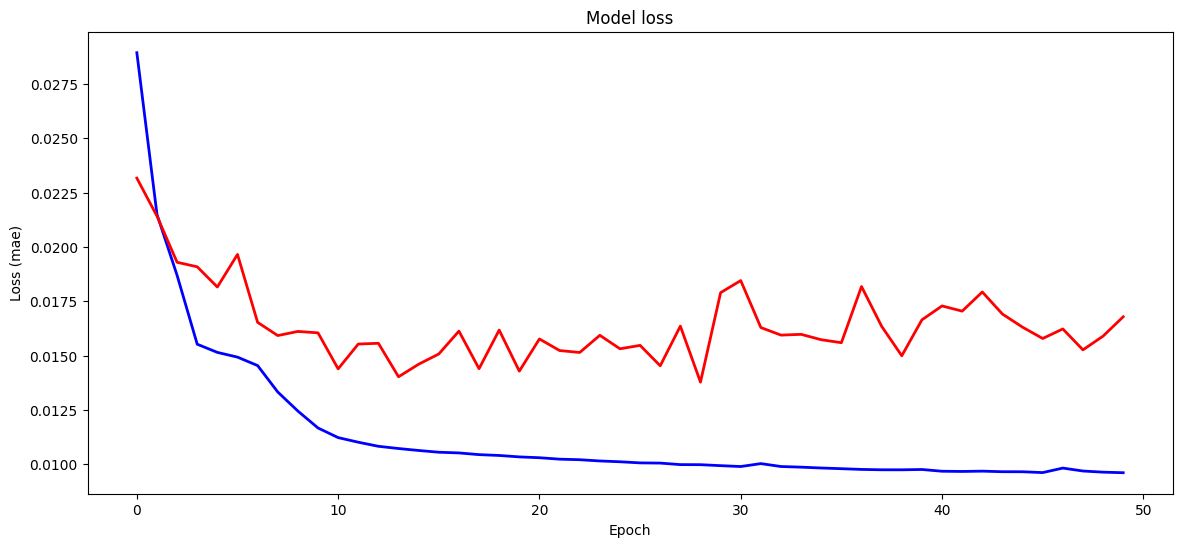

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,6))
ax.plot(history['loss'], 'b',label='Train',linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation',linewidth=2)
ax.set_title('Model loss')
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
plt.show()

In [ ]:
reconstructed_values = autoencoder_model.predict(x_train)

65901/65901 [==============================] - 78s 1ms/step


In [ ]:
reconstructed_values.shape

(2108812, 11)

In [ ]:
scored = pd.DataFrame(x_train,columns=df_resample.columns)
scored['Loss_mae'] = np.mean(np.abs(reconstructed_values-x_train),axis=1)

In [ ]:
scored

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS,Loss_mae
0,0.162946,0.980240,0.980240,0.571429,0.428571,0.061051,0.087719,0.646067,0.646067,0.0,0.0,0.037404
1,0.162946,0.015625,0.015625,0.000000,0.000000,0.640757,0.087719,0.000000,0.000000,0.0,0.0,0.002004
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.863386,0.280702,0.000000,0.000000,0.0,0.0,0.011896
3,0.162946,0.015625,0.015625,0.000000,0.000000,0.851316,0.087719,0.000000,0.000000,0.0,0.0,0.002492
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.760342,0.280702,0.000000,0.000000,0.0,0.0,0.010332
...,...,...,...,...,...,...,...,...,...,...,...,...
2108807,0.000000,0.007813,0.007813,0.000000,0.000000,0.941619,0.087719,0.004059,0.004059,0.0,0.0,0.017425
2108808,0.162946,0.015625,0.015625,0.000000,0.000000,0.506844,0.087719,0.000000,0.000000,0.0,0.0,0.000496
2108809,0.162946,0.980240,0.980240,0.500000,0.000000,0.548104,0.087719,0.000000,0.000000,0.0,0.0,0.008289
2108810,0.000000,0.007645,0.007645,0.000000,0.000000,0.594598,0.087719,0.001862,0.001862,0.0,0.0,0.051832


In [ ]:
scored['Threshold']= np.mean(scored['Loss_mae']) + np.std(scored['Loss_mae'])
scored['Anomaly']= scored['Loss_mae']>scored['Threshold']
#scored.plot(figsize=(16,9), color=['blue','red'])

In [ ]:
scored

,TCP_WIN_MSS_IN,TCP_WIN_MAX_IN,TCP_WIN_MIN_IN,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,L4_SRC_PORT,PROTOCOL,TCP_WIN_MAX_OUT,TCP_WIN_MIN_OUT,SRC_TOS,DST_TOS,Loss_mae,Threshold,Anomaly
0,0.162946,0.980240,0.980240,0.571429,0.428571,0.061051,0.087719,0.646067,0.646067,0.0,0.0,0.037404,0.039922,False
1,0.162946,0.015625,0.015625,0.000000,0.000000,0.640757,0.087719,0.000000,0.000000,0.0,0.0,0.002004,0.039922,False
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.863386,0.280702,0.000000,0.000000,0.0,0.0,0.011896,0.039922,False
3,0.162946,0.015625,0.015625,0.000000,0.000000,0.851316,0.087719,0.000000,0.000000,0.0,0.0,0.002492,0.039922,False
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.760342,0.280702,0.000000,0.000000,0.0,0.0,0.010332,0.039922,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108807,0.000000,0.007813,0.007813,0.000000,0.000000,0.941619,0.087719,0.004059,0.004059,0.0,0.0,0.017425,0.039922,False
2108808,0.162946,0.015625,0.015625,0.000000,0.000000,0.506844,0.087719,0.000000,0.000000,0.0,0.0,0.000496,0.039922,False
2108809,0.162946,0.980240,0.980240,0.500000,0.000000,0.548104,0.087719,0.000000,0.000000,0.0,0.0,0.008289,0.039922,False
2108810,0.000000,0.007645,0.007645,0.000000,0.000000,0.594598,0.087719,0.001862,0.001862,0.0,0.0,0.051832,0.039922,True


In [ ]:
scored['Anomaly'].value_counts()

False    1892826
True      215986
Name: Anomaly, dtype: int64

In [ ]:
pred =scored['Anomaly'].replace([False,True],[1,0])
pred

0          1
1          1
2          1
3          1
4          1
          ..
2108807    1
2108808    1
2108809    1
2108810    0
2108811    1
Name: Anomaly, Length: 2108812, dtype: int64

In [ ]:
print(y_train)

49681      1
1980601    0
450156     1
2751319    0
416863     1
          ..
804336     1
1976281    0
3251323    0
3589440    0
1929743    0
Name: ALERT, Length: 2108812, dtype: int64


In [ ]:
pred.shape

(2108812,)

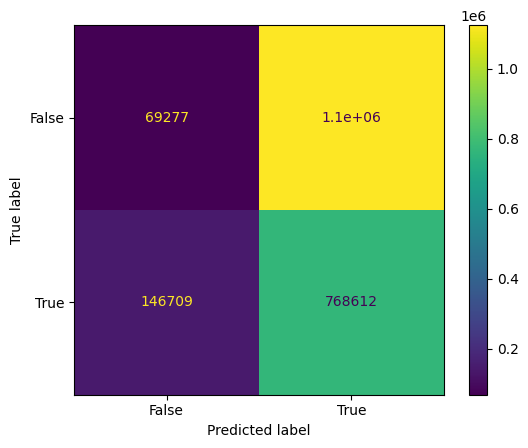

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
Accuracy = metrics.accuracy_score(y_train, pred)
Accuracy

0.39732750003319406

In [ ]:
Precision = metrics.precision_score(y_train, pred)
Precision

0.40606585074380847

In [ ]:
Recall = metrics.recall_score(y_train, pred)
Recall

0.8397185249764837

In [ ]:
F1_score = metrics.f1_score(y_train, pred)
F1_score

0.5474157869940569